<!-- ![](logo.jpeg) -->

# 1. Introduction

Continuous advancements in Unmanned Aerial Vehicle (UAV) technology have broadened its applications in agriculture. These innovations play a crucial role in fostering sustainable solutions and influencing policies and decisions in agriculture. However, the regulatory framework for UAV flights and the development of standardized protocols for precise data capture are continuously evolving. It is imperative to uphold accurate data quality for synergizing multiyear data and other spectral sensors (satellites, drones, field and lab sensors). To maintain high standards, some essential steps were proposed. 

# 2. Pre planning
## 2.1. Flight planning
* To carry successful drone surveys, a strategic flight planning is required using a standard flight planning software. Coordinate with the project representative to establish suitable flight parameters, including spatial resolution, date, and additional ancillary measurements. 

* Ensure the survey area is not within classfied airspace.

* List the equipment required for the survey. 

* Select clearly identifiable ground control point (GCP) locations within the survey area, essential for referencing UAV products.
  
* Ensure that the flight lines are positioned clear of any electric lines or poles that could potentially interfere with signal transmission.
## 2.2. Weather forecasting
Verify the weather forecast before initiating the survey.
Increasing availability atmosphere data from multiple satellites enables to predict accurate weather prediction for drone campaigns. 

Accessing weather information from ECMWF forecasts and Meteosat imagery allows the user to view up to two synchronised loops of the products. 

If possible, obtain local/in-situ weather conditions (cloud cover, wind etc.) from the site person. 
Although many of of UAV flights can withstand 35-50 km/hr winds, flying over 20km/hr will create vibrations thus image quality is effected.


## 2.3. Site and risk assessment and permissions
The pilot should identify the site using given coordinates in Google earth Maps or ArcGIS. 

Identify geographical features (big trees, bird conservation parks, tall building, electric polls/wires) around the survey area which might affect the data (electromagnetic interference) and flight planning.   

Identify possible hazards within the survey area. 

The restrictions (permanent and temporary) over the site should be checked. 

To ensure lawful and ethical operations, the site permission should be obtained from the project representative/ site manager.  
## 2.4. Flight survey time 

* Record the site conditions in the logbook before initiating the drone flight. 

* Check the GPS/GNSS quality, ensuring a minimum of 5 satellites are available.
  
* It is recommneded to conduct survey (applicable to spectral cameras only as it relies on natural illumination condictions) wihtin +/- two hours of solar noon  to reduce artifacts from shadows and sun angles. 

* Place the GCP and calibration targets in pre-defined locations. The calibration targets should be evaluted with a ground spectroradiometer in order to ensure clealiness and consistancy between the measurements. 

* Ensure sensors lens is clean if not clean with a lens tissue. 

* Turn ON instruments, especially the spectral camera, 15 minutes before collecting actual measurements. 

* Ensure that a clean calibration target should be used for the calibration. 

* It is advisable to record the calibration target before after the survey. If the survey area is big, additional measurements are required. 

* Record essential parameters in metadata sheet (Table 1) and logbook. 

## 2.5. Ancillary measurements to support UAV acquisitions. 
Calculating accurate surface reflectance values are essential in various applications and to synergies with other data. To support this, additional measurements can be conducted. 

**Field spectroradiometer**

* Simultaneously with the drone flight, ground spectral measurements can be acquired using a spectroradiometer to align with drone spectral data. 

* Downwelling solar radiation can be captured with a spectroradiometer, utilizing a sensor fiber attached to a cosine receptor and positioned upward with a tripod. 

**Sun photometer** for measuring aerosol optical thickness.

# 3. Data management

After the drone flight, cross checking is performed to ensure detailed metadata is recorded, and data is stored in an appropriately. Effective data management is crucial for subsequent analysis. The required metadata information is presented in Table 1.

Visual evaluation of images is necessary to identify undesirable aspects such as blurry images (RGB), illumination variations, and naming issues.



# 4. Data processing piepleines

The radiometric response of optical sensors/ remote sensing imagery play critical role in obtaining quantitative spectral infromation. Typically, the data from the spectral sensors can be delivered as digital numbers, radiance, and reflectance. 

* Digital numbers(DN) The amount of reflected light energy measured by the sensor recorded in the form of a binary integers which is not considered as qunatitative value thus not scientifc value. The range of binary integers depend on the radiometric resolution of the sensor. For example A sensor with 8 bits (rediometric resolution) records the data from 0 to 255, while 16 bits sensor records values from 0 to 65536.
Radiometric resolution indciates the sensor sensitivity to detect minor energy differences. High resolution sensors has higher sensitivity.



Table 1. The metadata template for UAV derived geospatial data

In [11]:
import pandas as pd
meta_data = pd.read_excel('data/Meta_data.xlsx') 
display(meta_data)

,Categories,Details
0,General meta information,• Name
1,NaN,• Data collection date
2,NaN,• Location
3,NaN,• Surveyor name
4,NaN,• Data link
5,NaN,• Brief summary from the field logbook
6,NaN,• Survey Begin Time
7,NaN,• Survey End time
8,NaN,• Platform
9,NaN,• Sensor


## 4.1. Converting Digital numbers to Radiance

Radiance The DN converted to radiance using the a gain and offset values per each band, this process also called as radiometric calibration. The gain and offset values generally supplied from teh sensor manufactrer, if not the values can be retrieved using an integrating sphere. The radaince units are watts/m2 steradian nm.

$$
L_{band} = DN * Gain_{band} + Offset_{band}
$$

where: 

* L_band = spectral radaince c(watts/(m2*steradian nm)
* DN = Digital numbers
* Gain =  Slope of the spectral band
* Offset = Intercept of the spectral band


## 4.2. Radiance to Reflectance

The portional of the light reflected from the object to the sensors. The reflectance measured in the range of 0-100% which depend on the properties of the reflected surface. Since the radiance values infleunced by various components (atmospheric and aerosol profile, and geometric factors) their interactions with radition, conversion into surface relfectance is essential to retrive phenological infromation.
Generally three methods are followed these effects.

* Empirical Line
* Atmospheric Radiative transfer model (RTM)
* Hybrid method

Empirical approaches for analyzing drone-based multispectral imagery are widely employed due to their relative simplicity in implementation and the ability to replicate the process under consistent illumination conditions. These approaches typically involve establishing a linear regression model between the radiance values recorded by the drone's sensors and those of reference panels with known reflectance properties.

The process begins with acquiring raw multispectral images from the drone's camera system. These images need to be calibrated and converted into reflectance maps, which represent the actual reflectance of the observed surfaces at different wavelengths. Additionally, the individual images must be stitched together to create a seamless mosaic of the surveyed area. This entire workflow can be facilitated by specialized photogrammetry software solutions, such as [Pix4D](https://www.pix4d.com/), [Agisoft](https://www.agisoft.com/), and ArcGIS [Drone2Map](https://esriaustralia.com.au/arcgis-drone2map). These softwares 

In the context of multispectral imagery, standard reference panels with known reflectance characteristics, typically a white panel (high reflectance) and a dark panel (low reflectance), are employed to determine the scale factor necessary for converting the raw image data into reflectance values. These reference panels are strategically placed within the survey area and are automatically detected by the photogrammetry software through the recognition of embedded QR codes or other identification markers. The software then uses the radiance values recorded for these panels to calculate the scale factor, which is subsequently applied to the entire image dataset, resulting in a calibrated reflectance cube representing the multispectral characteristics of the surveyed area.

## 4.3. Deriving vegetation indices

  

In [12]:
import numpy as np
import geopandas as gpd
import rasterio
import rasterio.plot
import matplotlib.pyplot as plt

image_array = rasterio.open('data/Multispec_30m.tif')
image_array.meta

{'driver': 'GTiff',
 'dtype': 'float32',
 'nodata': -32767.0,
 'width': 3529,
 'height': 3432,
 'count': 6,
 'crs': CRS.from_epsg(7853),
 'transform': Affine(0.020399847655346234, 0.0, 433027.87620212696,
        0.0, -0.020401199596840672, 6378518.849946602)}

In [13]:
# Spectral Bands

green = image_array.read(1)
blue = image_array.read(2)
red = image_array.read(3)
rededge = image_array.read(4)
nir = image_array.read(5)
panchromatic = image_array.read(6)

#NDVI - Normalized Vegetation Index
NDVI = (nir.astype(float) - red.astype(float)) / (nir + red)

#RVI - Simple Ratio Vegetation Index
RVI = nir.astype(float)/red.astype(float)

#SAVI - Soil Adjusted Vegetation Index
L= 0.5
SAVI = (nir.astype(float) - red.astype(float))/(nir.astype(float) + red.astype(float) + L)

# MSAVI2 - Modified Secondary Soil Adjusted Vegetation Index

MSAVI2 = 0.5 * (2 * nir.astype(float) + 1 - np.sqrt(2 * nir.astype(float) + 1) * 2 - 8*(nir.astype(float) - red.astype(float)))
                                                               
# ARVI - Atmospheric Resistant Vegetation Index
ARVI = (nir.astype(float) + blue.astype(float))/(nir.astype(float) - blue.astype(float))


C:\Users\a1233249\AppData\Local\Temp\ipykernel_3832\251264815.py:22: RuntimeWarning: invalid value encountered in sqrt
  MSAVI2 = 0.5 * (2 * nir.astype(float) + 1 - np.sqrt(2 * nir.astype(float) + 1) * 2 - 8*(nir.astype(float) - red.astype(float)))
C:\Users\a1233249\AppData\Local\Temp\ipykernel_3832\251264815.py:25: RuntimeWarning: divide by zero encountered in divide
  ARVI = (nir.astype(float) + blue.astype(float))/(nir.astype(float) - blue.astype(float))


# Visualise the plots on a raster

<Axes: >

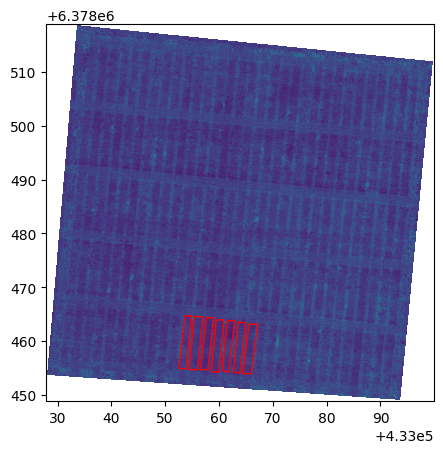

In [15]:
shape =gpd.read_file("data/ground_truth_shape 1.shp")
fig, ax = plt.subplots(figsize=(5, 5))
rasterio.plot.show(image_array, ax=ax)
shape.plot(ax=ax, facecolor='none', edgecolor='red')

# Extracting NDVI values of individual plots

In [18]:
import rasterstats as rs
affine=image_array.transform
stats = gpd.GeoDataFrame(rs.zonal_stats(shape, NDVI, affine=affine,stats=["mean"]))
gdf = shape.join(stats)
print(gdf.head())


   Shape_Leng  Shape_Area  Field  \
0   22.288812   12.436359    1.0   
1    0.000000    0.000000    2.0   
2    0.000000    0.000000    3.0   
3    0.000000    0.000000    4.0   
4    0.000000    0.000000    5.0   

                                            geometry      mean  
0  POLYGON Z ((433053.691 6378464.678 0.000, 4330...  0.207306  
1  POLYGON Z ((433055.474 6378464.640 0.000, 4330...  0.200503  
2  POLYGON Z ((433057.683 6378464.407 0.000, 4330...  0.226787  
3  POLYGON Z ((433059.505 6378463.903 0.000, 4330...  0.206959  
4  POLYGON Z ((433061.641 6378463.751 0.000, 4330...  0.213492  


C:\Users\a1233249\.conda\envs\book\Lib\site-packages\rasterstats\io.py:328: NodataWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn(


There is a lot more that you can do with outputs (such as including interactive outputs)
with your book. For more information about this, see [the Jupyter Book documentation](https://jupyterbook.org)